In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Obtaining our training dataset - here we load the csv which contains our training dataset and display the first 5 rows.

In [2]:
hd_data = pd.read_csv('heart_disease_train_nomissing.csv')
hd_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,1,30,1,0,0,0,1,...,1,0,5,30,30,1,0,9,5,1
1,1,1,1,1,22,0,1,0,0,1,...,1,0,3,30,0,1,0,12,4,4
2,1,1,1,1,37,1,1,0,0,0,...,1,0,5,0,0,1,1,10,6,5
3,1,1,1,1,30,1,0,0,1,0,...,1,0,4,10,17,1,0,9,4,1
4,1,1,1,1,33,1,0,0,1,0,...,1,0,3,1,0,0,1,11,6,6


This gives us info about the dataset and the variables, and whether there are any null entries.

In [3]:
hd_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248431 entries, 0 to 248430
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  248431 non-null  int64
 1   HighBP                248431 non-null  int64
 2   HighChol              248431 non-null  int64
 3   CholCheck             248431 non-null  int64
 4   BMI                   248431 non-null  int64
 5   Smoker                248431 non-null  int64
 6   Stroke                248431 non-null  int64
 7   Diabetes              248431 non-null  int64
 8   PhysActivity          248431 non-null  int64
 9   Fruits                248431 non-null  int64
 10  Veggies               248431 non-null  int64
 11  HvyAlcoholConsump     248431 non-null  int64
 12  AnyHealthcare         248431 non-null  int64
 13  NoDocbcCost           248431 non-null  int64
 14  GenHlth               248431 non-null  int64
 15  MentHlth              248431 non-n

The describe function provides basic statistical details about our dataset. Only columns containing numerical values are displayed but luckily all of our features are numerical values already. The 'T' following the describe function transposes the output table.

In [4]:
hd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,248431.0,0.072801,0.259810,0.0,0.0,0.0,0.0,1.0
HighBP,248431.0,0.420382,0.493621,0.0,0.0,0.0,1.0,1.0
HighChol,248431.0,0.415149,0.492749,0.0,0.0,0.0,1.0,1.0
CholCheck,248431.0,0.962179,0.190764,0.0,1.0,1.0,1.0,1.0
BMI,248431.0,27.265623,8.466858,0.0,24.0,27.0,31.0,98.0
Smoker,248431.0,0.436194,0.495913,0.0,0.0,0.0,1.0,1.0
Stroke,248431.0,0.037141,0.189108,0.0,0.0,0.0,0.0,1.0
Diabetes,248431.0,0.036107,0.266289,0.0,0.0,0.0,0.0,2.0
PhysActivity,248431.0,0.757389,0.428662,0.0,1.0,1.0,1.0,1.0
Fruits,248431.0,0.635899,0.481178,0.0,0.0,1.0,1.0,1.0


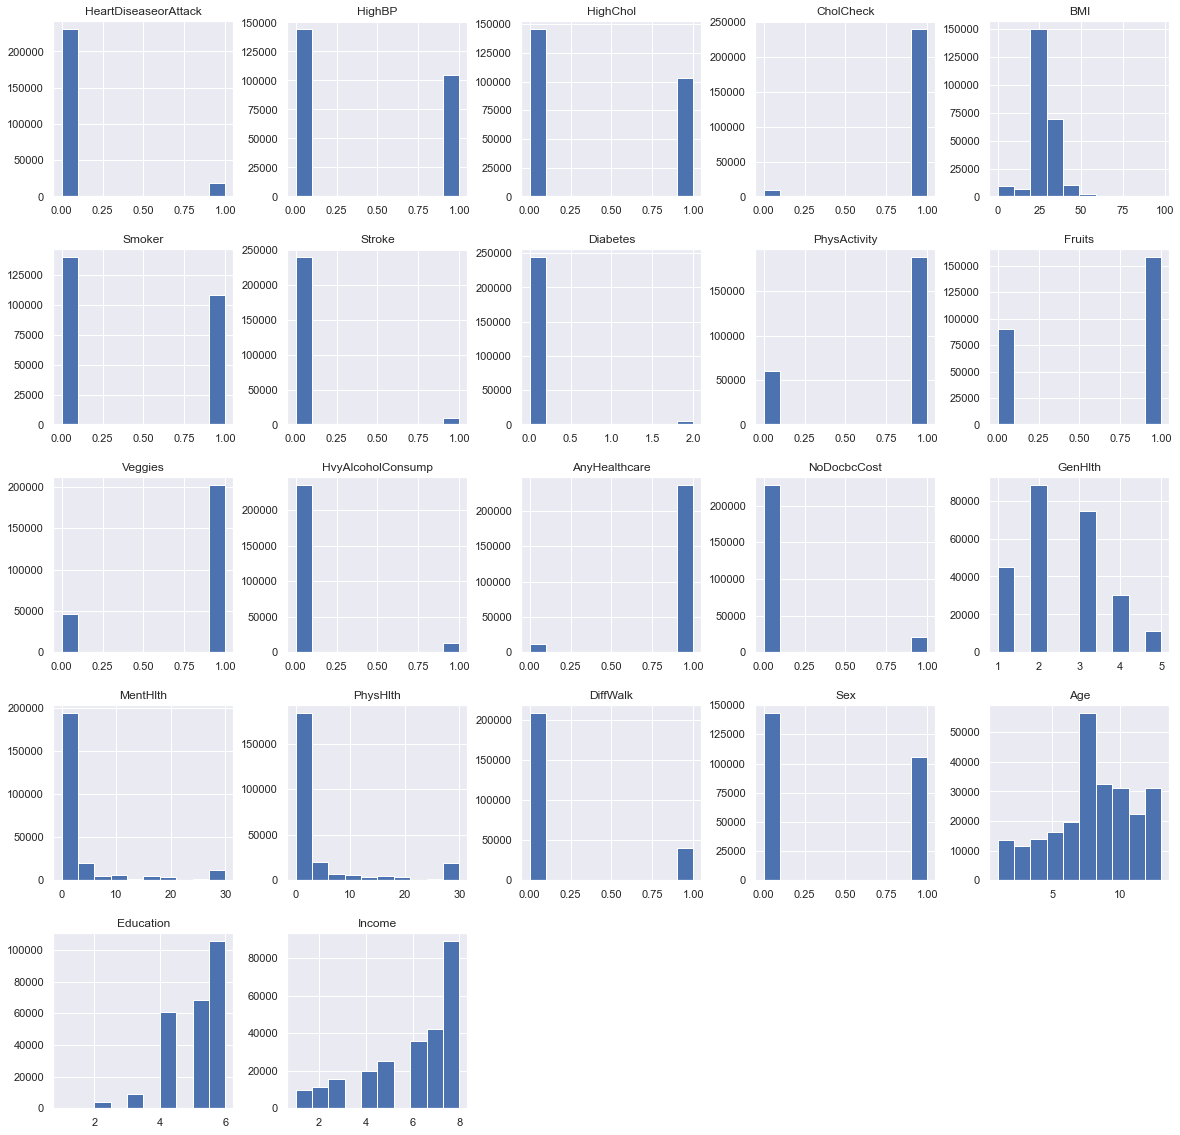

In [5]:
h = hd_data.hist(figsize = (20,20))

We are interested in the balance of the data. Below we plot a simple bar chart to illustrate class balance of heart disease patients vs non-heart disease patients in our training dataset.

0    230345
1     18086
Name: HeartDiseaseorAttack, dtype: int64


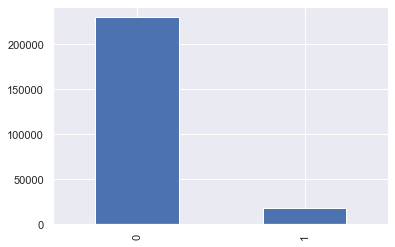

In [6]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = hd_data['HeartDiseaseorAttack'].map(lambda x: color_wheel.get(x + 1))
print(hd_data.HeartDiseaseorAttack.value_counts())
p=hd_data.HeartDiseaseorAttack.value_counts().plot(kind="bar")


In order to begin to visualise relationships between variables within our dataset, we can use pair plots. The scatter plots below show the relationship or lack of a relationship between each of the 22 features. As you may be able to spot, the diagonal of the matrix is made up of the histograms from above.

In [7]:
#from pd.tools.plotting import scatter_matrix
#pd.plotting.scatter_matrix(hd_data,figsize=(25, 25))
#bit long for 22 x 22


Could include pearsons coefficient or heatmap

# KNN Classification

Importance of scaling data for KNN
KNN is a distance based (typically Euclidean) supervised learning algorithm and chooses the  k closest neighburs. Based on these neighbours, it assigns the majority class.
Such distance based algorithms are affected by the scale and range of variables. The KNN algorithm is biased towards variables with smaller magnitudes, so this must be mitigated through normalisation of the features values. For each variable we use the following formula:
$ \begin{aligned}z=\frac{x-\mu}{\sigma}\end{aligned}$
\\
where $x$ is the initial value, $\mu$ is the variable mean and $\sigma$ is the variable standard deviation.

However, our KNN shall be calculating the distances using the M distance.

M distance normalises the data points whilst calculating the distance between data points. 

 The sklearn library has a built in KNeighboursClassifier function. 

In [8]:
#Manually get covariance matrix of features

def get_covariance_matrix(hd_data, ddof=0):
    n_samples = hd_data.shape[0]
    C = np.dot(hd_data.T, hd_data) / (n_samples - ddof)
    return C

C=get_covariance_matrix(hd_data)

print(C.shape)

(22, 22)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import DistanceMetric


cov_matrix = C

knn = KNeighborsClassifier(metric='mahalanobis', metric_params={'VI': np.linalg.inv(cov_matrix)}) 


x = hd_data.drop('HeartDiseaseorAttack',axis=1)
y = hd_data['HeartDiseaseorAttack']



In [ ]:
print('Class Ratio:',sum(hd_data['HeartDiseaseorAttack'])/len(hd_data['HeartDiseaseorAttack']))
#7.3% of our data is heart disease

# Downsampling

Here we downsample the patients who do not have heart disease. The code took too long to run on the full dataset, so by downsampling the majority class, we can improve our time complexity. We do not wish to downsample the minority class (positive for heart disease) as this could impact the performance of our model at detecting heart disease. We are less bothered by false positives as the purpose of our model is to inform heart disease screening, rather than heart disease diagnosis.

As we were aiming to also reduce our dataset size for run time reasons, we chose to downsample rather than upsample.

Risks associated - overtraining to our data, won't generalise well.

In [11]:
heart_disease = hd_data[hd_data["HeartDiseaseorAttack"] == 1]
no_hd = hd_data[hd_data["HeartDiseaseorAttack"] == 0]

print(heart_disease.shape)
print(no_hd.shape)

(18086, 22)
(230345, 22)


In [12]:
from sklearn.utils import resample
no_hd_downsample = resample(no_hd,
             replace=True,
             n_samples=len(heart_disease),
             random_state=42)

print(no_hd_downsample.shape)

(18086, 22)


<AxesSubplot:ylabel='Heart Disease or No Heart Disease'>

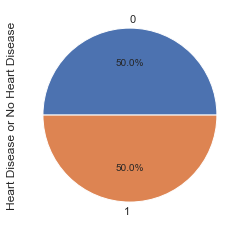

In [15]:
data_downsampled = pd.concat([no_hd_downsample, heart_disease])

data_downsampled.groupby('HeartDiseaseorAttack').size().plot(kind='pie',
                                       y = "HeartDiseaseorAttack",
                                       label = "Heart Disease or No Heart Disease",
                                       autopct='%1.1f%%')

In [16]:
x = data_downsampled.drop('HeartDiseaseorAttack',axis=1)
y = data_downsampled['HeartDiseaseorAttack']

# Brute force search

In [17]:
knn.fit(x,y)

KNeighborsClassifier(metric='mahalanobis',
                     metric_params={'VI': array([[ 1.67961753e+01, -5.14364776e-01, -5.86922333e-01,
         3.04717893e-01,  1.36508987e-02, -2.56959912e-01,
        -2.83594575e+00,  5.39581613e-02,  3.59603094e-02,
        -3.99218095e-02,  5.74599910e-02,  3.19290090e-01,
         2.31089325e-01,  7.71768168e-02, -3.81234815e-01,
         4.89026015e-03, -1.81226873e-02, -7.18372436e-01,
        -7...
        -2.79188002e-01],
       [ 7.45231270e-02,  5.85112120e-02, -1.74715718e-02,
        -2.47285470e-01, -3.28512248e-03,  9.04999209e-03,
         1.19625371e-01,  3.05199336e-02, -5.91295376e-02,
        -1.60547670e-02, -1.40301306e-01, -1.24101411e-01,
        -4.32225144e-01,  1.90699181e-01,  5.78338460e-02,
         5.60238292e-03,  2.75302072e-03,  2.30293815e-01,
        -1.63889859e-01,  6.29315456e-03, -2.79188002e-01,
         3.44943113e-01]])})

In [26]:
y.head()

140044    0
164953    0
150018    0
121780    0
137965    0
Name: HeartDiseaseorAttack, dtype: int64

In [29]:
knn.predict_proba(x.head())

array([[1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4]])

To run the whole downsampled dataset (approx. 36,000 datapoints), it takes approximately 8 minutes and we get an accuracy score of 0.745.

In [31]:
print(knn.score(x,y)) 


0.7454384606878248


# KD Tree

A k-dimensional tree (k-d tree) is a spatial index that uses a binary tree to divide up real coordinate space. For M reference points, searching for the nearest neighbor of a query point takes, on average, O(log M) time. This is faster than the O(M) time of the brute force algorithm.

In [ ]:
import collections
import operator

BT = collections.namedtuple("BT", ["value", "left", "right"])
BT.__doc__ = """
A Binary Tree (BT) with a node value, and left- and
right-subtrees.
"""

def kdtree(points):

#this works

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)


target = hd_data.loc[:,'HeartDiseaseorAttack']
fold_no = 1
for train_index, test_index in skf.split(hd_data, target):
    train = hd_data.loc[train_index,:]
    test = hd_data.loc[test_index,:]
    print('Fold',str(fold_no),'Class Ratio:',sum(test['HeartDiseaseorAttack'])/len(test['HeartDiseaseorAttack']))
    fold_no += 1

x = hd_data.drop('HeartDiseaseorAttack',axis=1)
y = hd_data['HeartDiseaseorAttack']

N_SPLITS = 4
y_preds = []

folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)

for fold, (train_id, test_id) in enumerate(folds.split(x, y)):
    X_train = x.iloc[train_id]
    y_train = y.iloc[train_id]
    X_valid = x.iloc[test_id]
    y_valid = y.iloc[test_id]
    
    model = KNeighborsClassifier(3)
    model.fit(X_train, y_train)
    
    valid_score = model.score(X_valid, y_valid)


def train_model(train, test, fold_no):
    X = hd_data.drop('HeartDiseaseorAttack',axis=1)
    y = hd_data['HeartDiseaseorAttack']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))

fold_no = 1
for train_index, test_index in skf.split(hd_data, target):
    train = hd_data.loc[train_index,:]
    test = hd_data.loc[test_index,:]
    print('Fold',str(fold_no),'Class Ratio:',sum(test['HeartDiseaseorAttack'])/len(test['HeartDiseaseorAttack']))
    train_model(train,test,fold_no)
    fold_no += 1

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(hd_data, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    print('Fold',str(fold_no),'Class Ratio:',sum(test['Returned_Units'])/len(test['Returned_Units']))
    fold_no += 1


Generally, KNN models are slow as they do not preprocess the data beforehand hence have a time complexity of O( 

# Hyperparameter Tuning

To improve model performance, we can tune the hyperparameters within our model. Adjusting the value of k and the leaf size can impact the model's performance. k can range from 1 to n however, if k is too small, the model will overfit. Contrastingly if k is too large, the model will underfit. We will use the grid search method to optimise our hyperparameters. Learn more about the grid search method here - https://towardsdatascience.com/gridsearch-the-ultimate-machine-learning-tool-6cd5fb93d07#:~:text=What%20is%20GridSearch%3F,of%20parameters%20for%20our%20data.

QUESTIONS FOR DAN
- what covariance matrix do you give mahalanobis distance metric
-in built feature covariance, check its the right way up 
- deals with covariance between features